# Importando as bibliotecas. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

%matplotlib inline

## Etapas do projeto
- Coleta de dados
- Análise de dados
- Criação de modelos
- Validação de modelos
- Apresentação dos resultados


#### Parametros

In [2]:
dataset = "./data/ecomerce.csv"
model = "./model/"
test_size_ = 0.3
n_estimators = 100
max_depth = 10

In [3]:
# Parameters
test_size_ = 0.25
dataset = "/opt/airflow/dags/projeto-data-science-papermill/data/ecomerce.csv"
model = "/opt/airflow/dags//projeto-data-science-papermill/model/"
n_estimators = 1000
max_depth = 5


#### Leitura dos dados

In [4]:
clientes = pd.read_csv(dataset)

In [5]:
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
clientes.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


- Qual a relação do cara que passa mais tempo no site em relação ao valor gasto anual?

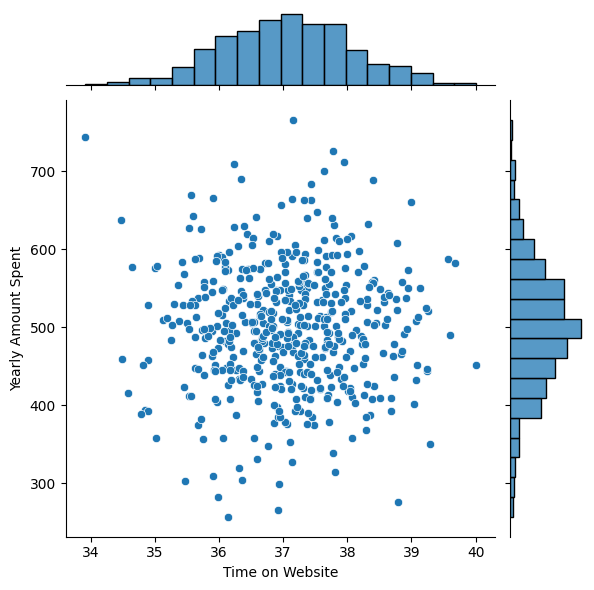

In [8]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=clientes)

- Qual a relação do cara que passa mais tempo no APP em relação ao valor gasto anual?  

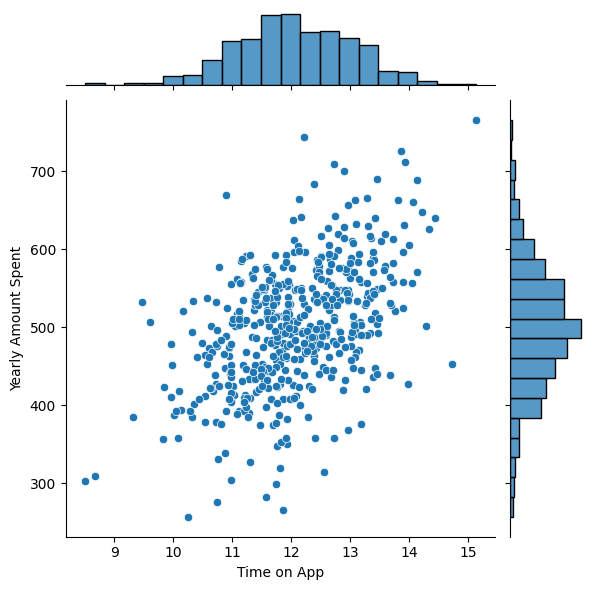

In [9]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=clientes)

- As pessoas que usam o aplicativo elas são clientes a mais tempo ou não?

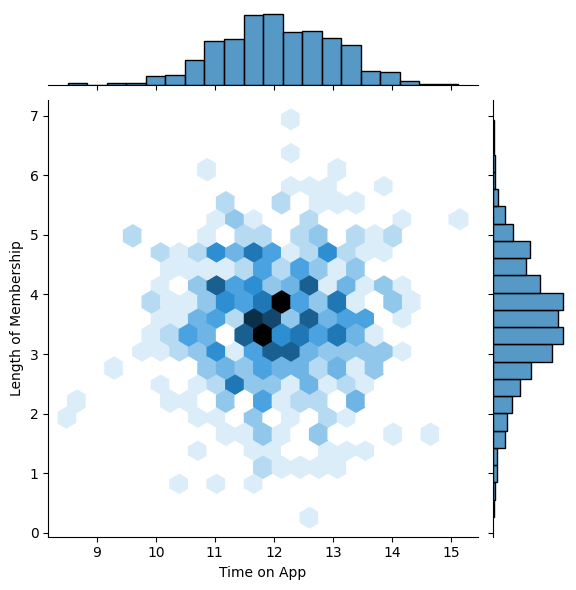

In [10]:
sns.jointplot(x='Time on App', y='Length of Membership', data=clientes, kind='hex')

- Quais variáveis conseguimos explicar ou que tem maior impacto no quanto uma pessoa gasta no ano?

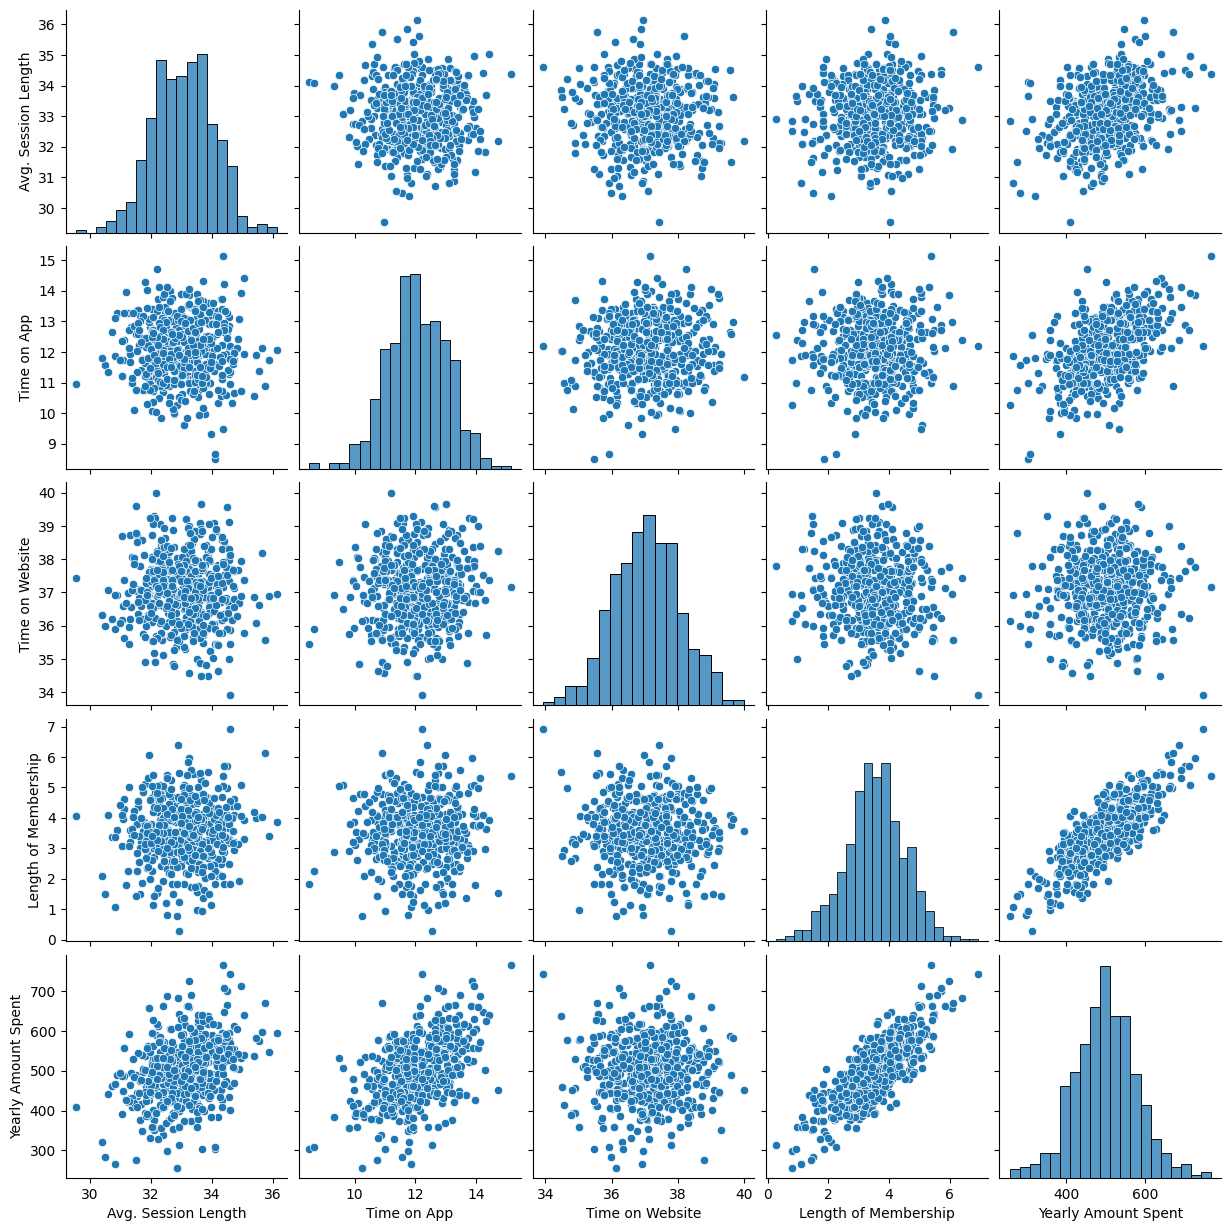

In [11]:
sns.pairplot(clientes)

- Como ficaria um modelo linear usando o Tempo de App em relação ao valor gasto?

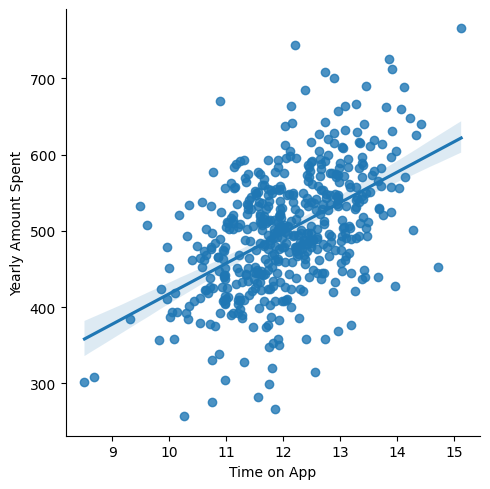

In [12]:
sns.lmplot(x='Time on App', y='Yearly Amount Spent', data=clientes)

- Como ficaria um modelo linear usando o Tempo de Membro em relação ao valor gasto?

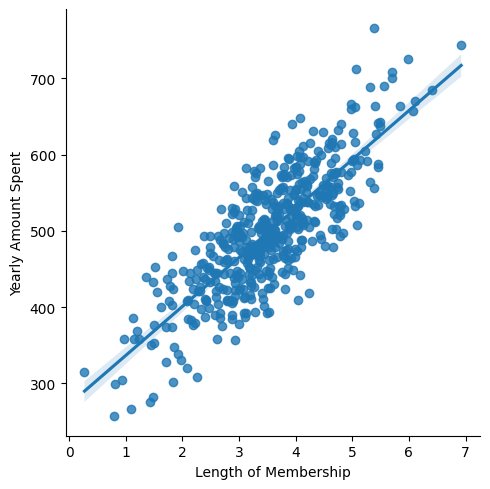

In [13]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=clientes)

## 3. Criação de um Modelo com todas as variáveis

- Separa quem meu X e meu y

In [14]:
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [15]:
y = clientes['Yearly Amount Spent']

In [16]:
X = clientes[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

- Dividir meu conjunto em treino e teste usando sckit learning

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=test_size_,random_state=42)

In [19]:
y_train.shape

(375,)

In [20]:
y_test.shape

(125,)

- Criar um modelo de regressão linear usando sklearn

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rf = RandomForestRegressor(
            n_estimators = n_estimators,
            max_depth = max_depth,
)

In [23]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=1000)

- Para validar o modelo no conjunto de teste, você precisa utilizar o método predict()

In [24]:
ỹ = rf.predict(X_test)

In [25]:
ỹ

array([427.66436904, 542.61477507, 489.78544708, 500.42841989,
       435.45816274, 553.13028573, 510.23075792, 506.90491252,
       414.24607937, 473.09858134, 447.49293686, 415.35729497,
       438.9695251 , 539.57655855, 423.69186755, 423.50842023,
       568.44332615, 477.98230616, 455.07355682, 483.08925048,
       455.08004883, 503.86579136, 500.79679464, 611.27570687,
       429.39107637, 510.67269932, 535.45458308, 550.84343863,
       408.15620551, 362.70662676, 545.81205059, 483.22051682,
       498.22819959, 318.82060738, 519.69145557, 474.72917793,
       527.63778093, 440.80676092, 454.6525961 , 478.35462669,
       479.90228947, 424.21660607, 502.68820444, 501.13190019,
       483.38094633, 538.32985668, 575.39892631, 518.29748225,
       332.2349029 , 447.75957574, 436.81519001, 484.06962284,
       576.87878516, 590.80445351, 568.6282467 , 483.14561027,
       398.16909298, 424.84246834, 553.9771768 , 514.05654326,
       503.47248919, 389.60594048, 495.29637484, 479.22

** Crie um diagrama de dispersão (scatterplot) dos valores reais de teste em relação aos valores preditos. **

Text(0, 0.5, 'ỹ predito')

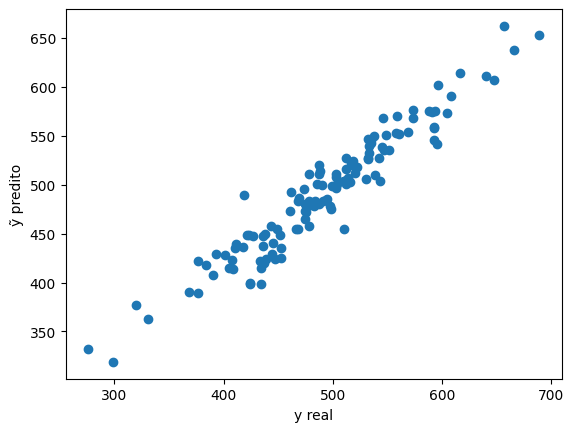

In [26]:
plt.scatter(y_test, ỹ)
plt.xlabel('y real')
plt.ylabel('ỹ predito')

#### Imprime os parametros do modelo.

In [27]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## 4. Avaliando o Modelo

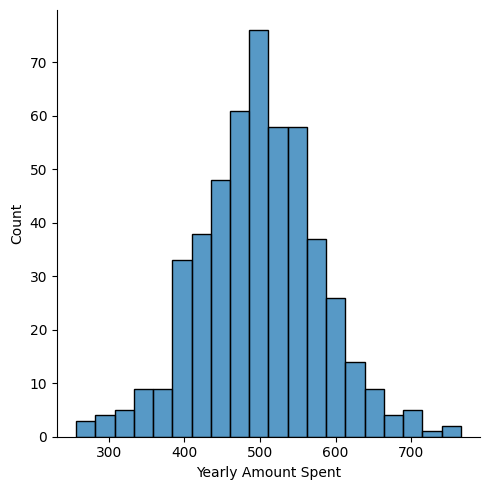

In [28]:
sns.displot(clientes, x="Yearly Amount Spent")
plt.tight_layout()

In [29]:
from sklearn import metrics

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, ỹ))
print('MSE:', metrics.mean_squared_error(y_test, ỹ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ỹ)))
print('R2:', metrics.r2_score(y_test,ỹ))

MAE: 17.105568276084263
MSE: 483.1799122594205
RMSE: 21.981353740373237
R2: 0.9115890828571219


In [31]:
metricas = pd.DataFrame(data=None,columns=["MAE","MSE","RMSE","R2"])

In [32]:
metricas['MAE'] = [metrics.mean_absolute_error(y_test,ỹ)]
metricas['MSE'] = [metrics.mean_squared_error(y_test,ỹ)]
metricas['RMSE'] = [np.sqrt(metrics.mean_squared_error(y_test, ỹ))]
metricas['R2'] = [metrics.r2_score(y_test,ỹ)]

In [33]:
metricas.head()

,MAE,MSE,RMSE,R2
0,17.105568,483.179912,21.981354,0.911589


## Exportando o modelo.

In [34]:
joblib.dump(rf,model+"model.joblib")

['/opt/airflow/dags//projeto-data-science-papermill/model/model.joblib']

# Rodando o papermill

papermill regression-project.ipynb output.ipynb -p test-size 0.25 -p dataset "./data/ecomerce.csv" -p model "./model/" -p n_estimators 1000 -p max_depth 5 --stdout-file test.txt --stderr-file err.txt